In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고가 뜨지 않도록..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 출력 창 청소
from IPython.display import clear_output

import time


# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층 모델(은닉층과 출력층)
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징을 두드러지게 한다.
from tensorflow.keras.layers import Conv2D
# MaxPooling : 불필요한 부분을 제거하는 역할을 한다
from tensorflow.keras.layers import MaxPool2D
# Flatten : CNN, MaxPooling은 2차원 데이터를 사용하고 출력하기 때문에 1차원 데이터로 변하는 것을 사용해야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 노드의 일부를 on/off 하면서 과적합을 예방한다.
from tensorflow.keras.layers import Dropout


# 데이터 표준화
from sklearn.preprocessing import StandardScaler
# 문자열을 숫자로 변환
from sklearn.preprocessing import LabelEncoder
# 원핫인코딩
from tensorflow.keras.utils import to_categorical

# 학습데이터와 검증데이터로 나눈다
from sklearn.model_selection import train_test_split

# K폴드 교차검증
from sklearn.model_selection import KFold

# 저장된 모델을 복원
from tensorflow.keras.models import load_model

# epoch 마다 저장하기 위해 사용
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기중단을 위해 사용
from tensorflow.keras.callbacks import EarlyStopping

# GPU 할당
gpus = tf.config.experimental.list_physical_devices('GPU')
# GPU가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)


In [2]:
# MNIST 데이터
from tensorflow.keras.datasets import mnist


In [3]:
# 랜덤 시드 설정
np.random.seed(1)
tf.random.set_seed(1)


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train = X_train[:1000]
# y_train = y_train[:1000]
# X_test = X_test[:100]
# y_test = y_test[:100]


In [5]:
# 이미지 한장은 2차원 데이터로 구성되어 있기 때문에
# 행 하나 전체 데이터를 계산하는 딥러닝을 위해 1차원으로 변경한다.
# 3차원 행렬 -> 2차원
# 이미지의 개수
cnt = X_train.shape[0]
# 이미지의 세로길이
h1 = X_train.shape[1]
# 이미지의 가로길이
w1 = X_train.shape[2]
# 채널
channel = 1

# 3차원 행렬 데이터를 4차원으로 변경한다.
# CNN은 이미지 한장을 가로, 세로, 채널 구조의 행렬로 받기 때문이다.
X_train = X_train.reshape(cnt, w1, h1, channel)
# 0 ~ 1사의 숫자로 변경한다.
X_train = X_train.astype('float64')
X_train = X_train / 255
X_train[0]


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [6]:
# 이미지 한장은 2차원 데이터로 구성되어 있기 때문에
# 행 하나 전체 데이터를 계산하는 딥러닝을 위해 1차원으로 변경한다.
# 3차원 행렬 -> 2차원
# 이미지의 개수
cnt = X_test.shape[0]
# 이미지의 세로길이
h1 = X_test.shape[1]
# 이미지의 가로길이
w1 = X_test.shape[2]
# 채널
channel = 1

# 3차원 행렬 데이터를 4차원으로 변경한다.
# CNN은 이미지 한장을 가로, 세로, 채널 구조의 행렬로 받기 때문이다.
X_test = X_test.reshape(cnt, w1, h1, channel)
# 0 ~ 1사의 숫자로 변경한다.
X_test = X_test.astype('float64')
X_test = X_test / 255
X_test[0]


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [7]:
# 결과데이터 원핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
# CNN  구성
# Conv2d : 케라스에서 컨볼루션 레이어를 추가하는 함수
# Maxpooling2D : 데이터 축소
# Dropout : 은닉층의 노드를 임의로 꺼주는 것(과적합 방지)
# Flatten : 2차원 배열을 1차원으로 변환(결과 출력을 위해)
model = Sequential()

# kernel_size : 커널(마스크)의 사이즈
# input_shape : 입력노드 정보. ( 가로, 세로, 채널)
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# CNN 은닉층은 보통 2배씩 증가시킴
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))

# 보통 두개 하고 MaxPooling 씀
model.add(MaxPool2D(pool_size=2))

# 그리고 Dropout
model.add(Dropout(0.25))

# 출력층 직전의 은닉층
# 데이터를 모아 1차원으로 변환하는 역할을 수행한다.
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 출력
model.add(Dense(10))
model.add(Activation('softmax'))


In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                        

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [11]:
# 모델들이 저장될 파일명
# epoch : 학습 횟수
# val_loss : 검증 데이터 손실률
path1 = 'model/24/{epoch}-{val_loss}.h5'
path2 = 'model/24/최종.h5'

# 저장 콜백 설정
# save_best_only : True로 설정하면 개선이 되었을 때만 저장한다.
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', 
                        save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss',
                        save_best_only=True)

# 조기 중단 콜백
# patience : 개선이 된 이후 몇 번을 더 볼 것인가를 설정한다.
# 이 횟수 동안 개선이 되지 않으면 중단 시킨다.
call3 = EarlyStopping(monitor='val_loss', patience=50)


In [12]:
# 학습한다.
with tf.device('/CPU:0'): 
    history = model.fit(X_train, y_train, epochs=2000, batch_size=500, 
              validation_data=[X_test, y_test],
              callbacks=[call1, call2, call3])


Epoch 1/2000
120/120 [==============================] - 37s 308ms/step - loss: 0.4191 - accuracy: 0.8719 - val_loss: 0.0814 - val_accuracy: 0.9758
Epoch 2/2000
120/120 [==============================] - 37s 312ms/step - loss: 0.1176 - accuracy: 0.9652 - val_loss: 0.0522 - val_accuracy: 0.9844
Epoch 3/2000
120/120 [==============================] - 38s 318ms/step - loss: 0.0809 - accuracy: 0.9761 - val_loss: 0.0416 - val_accuracy: 0.9869
Epoch 4/2000
120/120 [==============================] - 38s 316ms/step - loss: 0.0648 - accuracy: 0.9804 - val_loss: 0.0379 - val_accuracy: 0.9871
Epoch 5/2000
120/120 [==============================] - 38s 314ms/step - loss: 0.0557 - accuracy: 0.9831 - val_loss: 0.0299 - val_accuracy: 0.9903
Epoch 6/2000
120/120 [==============================] - 37s 309ms/step - loss: 0.0485 - accuracy: 0.9855 - val_loss: 0.0301 - val_accuracy: 0.9904
Epoch 7/2000
120/120 [==============================] - 37s 312ms/step - loss: 0.0432 - accuracy: 0.9871 - val_loss: 0

120/120 [==============================] - 35s 295ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.0354 - val_accuracy: 0.9922
Epoch 57/2000
120/120 [==============================] - 33s 274ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.0383 - val_accuracy: 0.9928
Epoch 58/2000
120/120 [==============================] - 32s 265ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.0338 - val_accuracy: 0.9928
Epoch 59/2000
120/120 [==============================] - 32s 269ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0350 - val_accuracy: 0.9931
Epoch 60/2000
120/120 [==============================] - 32s 267ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0370 - val_accuracy: 0.9935
Epoch 61/2000
120/120 [==============================] - 31s 262ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0397 - val_accuracy: 0.9931
Epoch 62/2000
120/120 [==============================] - 31s 262ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0358 -

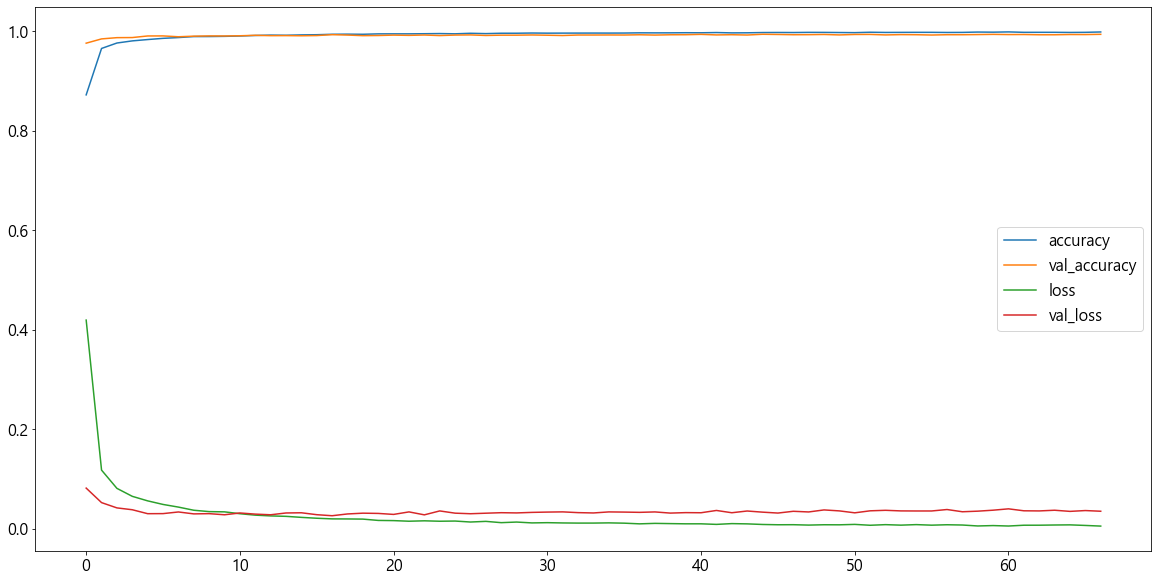

In [13]:
# 오차 정도를 그래프로 그린다.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [14]:
# 모델을 복원한다.
model2 = load_model(path2)
model2


In [15]:
with tf.device('/CPU:0'): 
    a1 = model2.evaluate(X_test, y_test)
    print(f'손실률 : {a1[0]}')
    print(f'정확도 : {a1[1]}')


313/313 [==============================] - 3s 10ms/step - loss: 0.0258 - accuracy: 0.9929
손실률 : 0.0258458461612463
정확도 : 0.992900013923645


In [16]:
with tf.device('/CPU:0'): 
    pred = model2.predict(X_test)


In [17]:
pred2 = np.argmax(pred, axis=-1)
pred2


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [18]:
# 얼마나 일치하는가...
y_test2 = np.argmax(y_test, axis=-1)

r1 = accuracy_score(y_test2, pred2)
r1


0.9929